In [29]:
import numpy as np
from PIL import Image
import cv2 
import matplotlib.pyplot as plt

#class to calculate metrics (IoU, Dice, etc.)
class Metrics:
    def __init__(self):
        super(Metrics, self).__init__()

    #function to calculate relevant metrics on data
    def calculateMetrics(self, gt, pred):
        iou = self.__jaccardIndex(gt, pred) #iou
        dice = self.__diceCoefficient(gt, pred) #dice coefficient
        sensitivity = self.__sensitivity(gt, pred)
        specificity = self.__specificity(gt, pred)
        precision = self.__precision(gt, pred)
        accuracy = self.__accuracy(gt, pred)

        return iou, dice, sensitivity, specificity, precision, accuracy

    #function to calculate the jaccard index (IoU)
    @staticmethod
    def __jaccardIndex(gt, pred):
        intersection = np.logical_and(pred, gt)
        union = np.logical_or(pred, gt)
        iou = intersection.sum() / union.sum()
        return iou

    #function to calculate the Dice coefficient 
    @staticmethod
    def __diceCoefficient(gt, pred):
        intersection = np.logical_and(pred, gt)
        totals = pred.sum() + gt.sum()
        dice = (2 * intersection.sum()) / totals
        return dice

    #function to calculate the sensitivity 
    @staticmethod
    def __sensitivity(gt, pred): #aka recall
        tp = np.logical_and(gt, pred).sum() #true positives
        fn = ((gt - pred) == 1).sum()
        sensitivity = tp / (tp + fn)
        return sensitivity #ability to detect true positives (white pixels)

    #function to calculate the specificity 
    @staticmethod
    def __specificity(gt, pred):
        not_gt = np.logical_not(gt)
        not_pred = np.logical_not(pred)
        tn = np.logical_and(not_gt, not_pred).sum()
        fp = ((pred - gt) == 1).sum()
        specficity = tn / (tn + fp)
        return specficity #ability to detect true negatives (background)
    
    #function to calculate precision
    @staticmethod
    def __precision(gt, pred):
        tp = np.logical_and(gt, pred).sum() #true positives
        fp = ((pred - gt) == 1).sum()
        precision = tp / (tp + fp)
        return precision #positive predictive value
    
    #function to calculate overall accuracy
    @staticmethod
    def __accuracy(gt, pred):
        true = (gt == pred).sum()
        accuracy = true / (gt.shape[0] * gt.shape[1])
        return accuracy

In [30]:
gt_mask = np.array(Image.open("gt_masks\\CC7.265.1.2023.10.16.png").convert("L"), dtype=np.uint8)
(thresh, gt_mask) = cv2.threshold(gt_mask, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gt_mask[gt_mask == 255] = 1.0
gt_mask.shape

(1080, 1920)

In [51]:
# pred_mask = np.load("CC7.265.1.2023.10.16_mask_image.npy")
# pred_mask = np.sum(pred_mask, axis=2)
import os
mask_dir = "masks_npy\\CC7.265.1.2023.10.13"
pred_mask = np.zeros((1080, 1920))

for mask_file in os.listdir(mask_dir):
    mask = np.load(os.path.join(mask_dir, mask_file))
    mask = np.sum(mask, axis=0)
    pred_mask += mask
pred_mask[pred_mask > 4] = 1

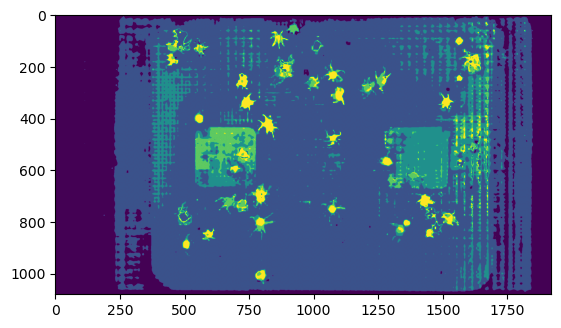

In [52]:
plt.imshow(pred_mask)
plt.show()

In [ ]:


print(test.shape)

(1080, 1920)
